<a href="https://colab.research.google.com/github/Kshireen/ML/blob/main/Cardiac_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import pathlib
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping


In [ ]:
# Defining the path for train and test images
train_path=r"D:\heart ca\Training_images\Training_images"
test_path=r"D:\heart ca\Test_images\Test_images"
val_path=r"D:\heart ca\Validation_images\Validation_images"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)
data_dir_val = pathlib.Path(val_path)

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.png')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.png')))
print(image_count_test)
image_count_val=len(list(data_dir_val.glob('*/*.png')))
print(image_count_val)

4668
1191
100


In [ ]:
batch_size = 32
img_height = 128
img_width = 128

In [ ]:
## Used seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, batch_size=32, image_size=(128,
    128), shuffle=True, seed=123,
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 4668 files belonging to 2 classes.


In [ ]:
## Used seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_val, labels='inferred', label_mode='categorical',
    class_names=None, batch_size=32, image_size=(128,
    128), shuffle=True, seed=123,
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 100 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Negative', 'Positive']


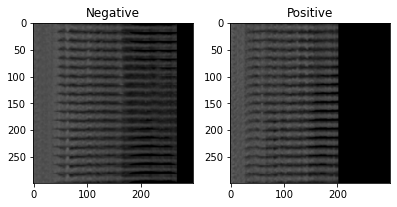

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(2):
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.png'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs =20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=[EarlyStopping(patience=10)]
)

Epoch 1/20
146/146 [==============================] - 61s 321ms/step - loss: 16.0914 - accuracy: 0.6150 - val_loss: 1.0212 - val_accuracy: 0.6800
Epoch 2/20
146/146 [==============================] - 39s 270ms/step - loss: 0.9792 - accuracy: 0.7059 - val_loss: 0.9555 - val_accuracy: 0.6800
Epoch 3/20
146/146 [==============================] - 40s 272ms/step - loss: 0.9272 - accuracy: 0.7069 - val_loss: 0.9153 - val_accuracy: 0.6900
Epoch 4/20
146/146 [==============================] - 40s 271ms/step - loss: 0.8875 - accuracy: 0.7151 - val_loss: 0.8865 - val_accuracy: 0.6600
Epoch 5/20
146/146 [==============================] - 44s 301ms/step - loss: 0.8605 - accuracy: 0.7147 - val_loss: 0.8678 - val_accuracy: 0.6600
Epoch 6/20
146/146 [==============================] - 42s 285ms/step - loss: 0.8313 - accuracy: 0.7217 - val_loss: 0.8518 - val_accuracy: 0.6600
Epoch 7/20
146/146 [==============================] - 41s 281ms/step - loss: 0.8200 - accuracy: 0.7198 - val_loss: 0.8383 - val_a

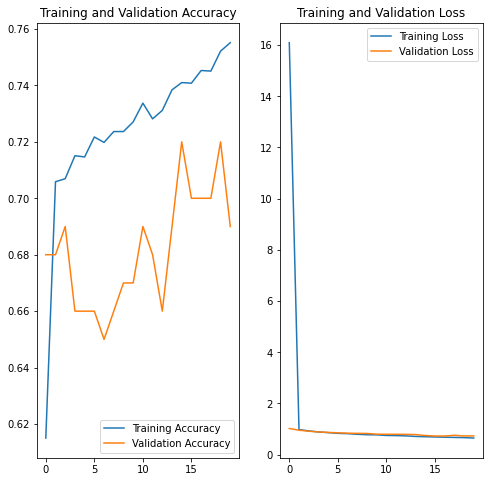

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Centerline detection, radius and diameter 3D images

In [ ]:
DATASET_PATH = r"C:\Users\saval\Downloads\heart ca"

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train1 = pathlib.Path(r"D:\Data lake\x ray  heart\data")

In [ ]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.png')))
print(image_count_train1)

5480


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_folder = tf.keras.utils.image_dataset_from_directory(
  data_dir_train1,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5480 files belonging to 10 classes.
Using 4384 files for training.


In [ ]:
test_folder = tf.keras.utils.image_dataset_from_directory(
  data_dir_train1,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5480 files belonging to 10 classes.
Using 1096 files for validation.


In [ ]:
class_names = train_folder.class_names
print(class_names)

['Coronary sinus', 'Descending aorta', 'Inferior vena cava', 'Left atrial appendage', 'New folder', 'Papillary muscle – LV', 'Posterior mitral leaflet', 'Proximal ascending aorta', 'Pulmonary artery', 'Superior vena cava']


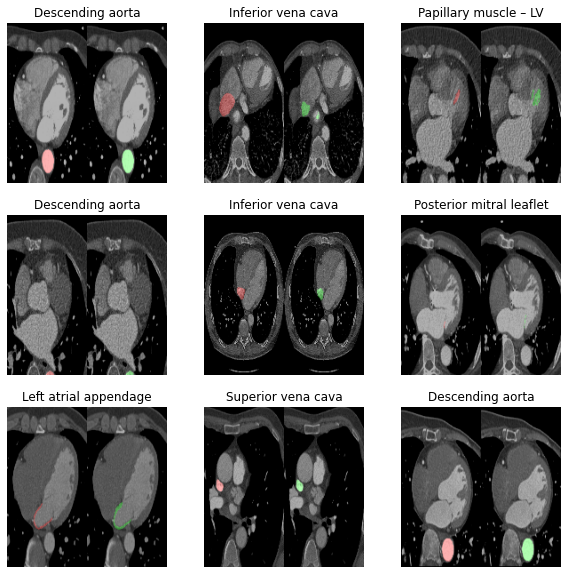

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_folder.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_folder.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = test_folder.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import cv2
import numpy as np
import os

# Define function to preprocess and save image
def preprocess_and_save_image(file_path):
    # Load image
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Preprocess image
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

    # Segment image
    if np.mean(img) < 128:  # If negative image
        img = cv2.bitwise_not(img)
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    edges = cv2.Canny(thresh, 50, 150)

    # Identify seed pixel
    lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
    rho, theta = lines[0][0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

    # Extract centerline
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    _, centerline = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
    centerline = np.uint8(centerline)
    centerline_contours, _ = cv2.findContours(centerline, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    centerline = cv2.drawContours(centerline, centerline_contours, -1, 255, 1)

    # Calculate radius and diameter
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    (x,y),radius = cv2.minEnclosingCircle(contours[0])
    diameter = int(radius*2)

    # Draw results on image
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = cv2.line(img, pt1, pt2, (0,0,255), 2)
    img = cv2.drawContours(img, contours, -1, (0,255,0), 2)
    img = cv2.drawContours(img, centerline_contours, -1, (0,0,255), 1)
    cv2.putText(img, f"Diameter: {diameter}px", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    filename = os.path.splitext(os.path.basename(file_path))[0] + '_preprocessed.png'
    cv2.imwrite(filename, img)

    return img

# Loop through each image in the directory
for file in os.listdir(r"D:\Data lake\x ray  heart\data"):
    if file.endswith('.png'):
        # Process image
        img = preprocess_and_save_image


In [ ]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data generators for training and testing data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir_train1,
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    r"D:\Data lake\x ray  heart\Test",
    target_size=(512, 512),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale')

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator)

Found 5480 images belonging to 10 classes.
Found 604 images belonging to 10 classes.
Epoch 1/10
172/172 [==============================] - 641s 4s/step - loss: 1.8339 - accuracy: 0.3281 - val_loss: 1.8272 - val_accuracy: 0.3361
Epoch 2/10
172/172 [==============================] - 639s 4s/step - loss: 1.3219 - accuracy: 0.3973 - val_loss: 2.1360 - val_accuracy: 0.3510
Epoch 3/10
172/172 [==============================] - 671s 4s/step - loss: 1.0573 - accuracy: 0.5650 - val_loss: 3.1600 - val_accuracy: 0.3874
Epoch 4/10
172/172 [==============================] - 671s 4s/step - loss: 0.7299 - accuracy: 0.7115 - val_loss: 3.0180 - val_accuracy: 0.4007
Epoch 5/10
172/172 [==============================] - 682s 4s/step - loss: 0.5600 - accuracy: 0.7786 - val_loss: 2.7993 - val_accuracy: 0.4255
Epoch 6/10
172/172 [==============================] - 666s 4s/step - loss: 0.4640 - accuracy: 0.8161 - val_loss: 3.4282 - val_accuracy: 0.4520
Epoch 7/10
172/172 [==============================] - 743

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

# Load your trained model (replace 'your_model.h5' with your model file)
model = tf.keras.models.load_model('your_model.h5')

# Function to preprocess and classify an image
def classify_image():
    try:
        # Open a file dialog for the user to select an image
        file_path = filedialog.askopenfilename()

        if file_path:
            # Load and preprocess the selected image
            img = Image.open(file_path)
            img = img.resize((128, 128))  # Resize to match your model's input size
            img = np.array(img)
            img = img / 255.0  # Normalize pixel values (if needed)
            img = np.expand_dims(img, axis=0)  # Add batch dimension

            # Make predictions using the model
            predictions = model.predict(img)
            class_index = np.argmax(predictions[0])
            class_name = class_names[class_index]

            # Display the result
            result_label.config(text=f"Predicted Class: {class_name}")

            # Display the selected image
            img = Image.open(file_path)
            img.thumbnail((200, 200))  # Resize for display
            img = ImageTk.PhotoImage(img)
            image_label.config(image=img)
            image_label.image = img  # Keep a reference

    except Exception as e:
        messagebox.showerror("Error", str(e))

# Create a Tkinter window
window = tk.Tk()
window.title("Image Classification App")

# Create labels for displaying the image and prediction
image_label = tk.Label(window)
image_label.pack()
result_label = tk.Label(window, text="Predicted Class: ")
result_label.pack()

# Create a button to trigger image classification
classify_button = tk.Button(window, text="Classify Image", command=classify_image)
classify_button.pack()

# Run the GUI application
window.mainloop()
